In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
import plotly
from skimage import io
from skimage import morphology as morp
import plotly.express as px
import plotly.graph_objects as go


(512, 512, 3)


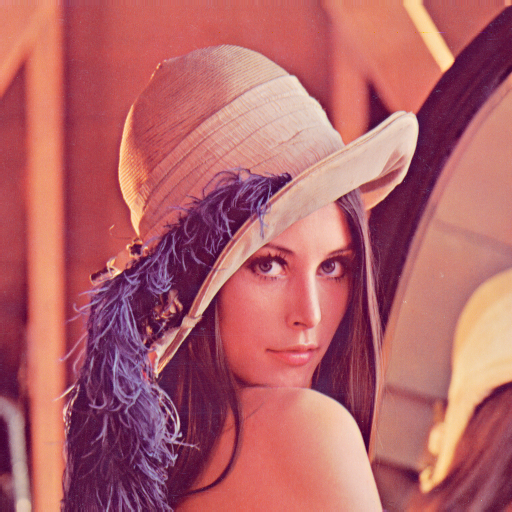

In [4]:
# Ex 1
# Read lena.png and print the dimensions.
# Read chair.png and print the dimensions.
# Verify if you are getting 4 channels in chair.png
# Plot the mask of the chair in the image chair.png

I = cv2.imread('/content/drive/My Drive/lena.png')
print (I.shape)
cv2_imshow(I)


In [5]:
I = cv2.imread('/content/drive/My Drive/chair.png')
print (I.shape)



(137, 137, 3)


(137, 137, 4)


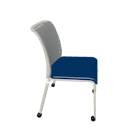

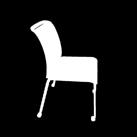

In [6]:
I = cv2.imread('/content/drive/My Drive/chair.png', cv2.IMREAD_UNCHANGED)
print (I.shape)
cv2_imshow(I)
#The plot of the mask
cv2_imshow(I[:,:,3])

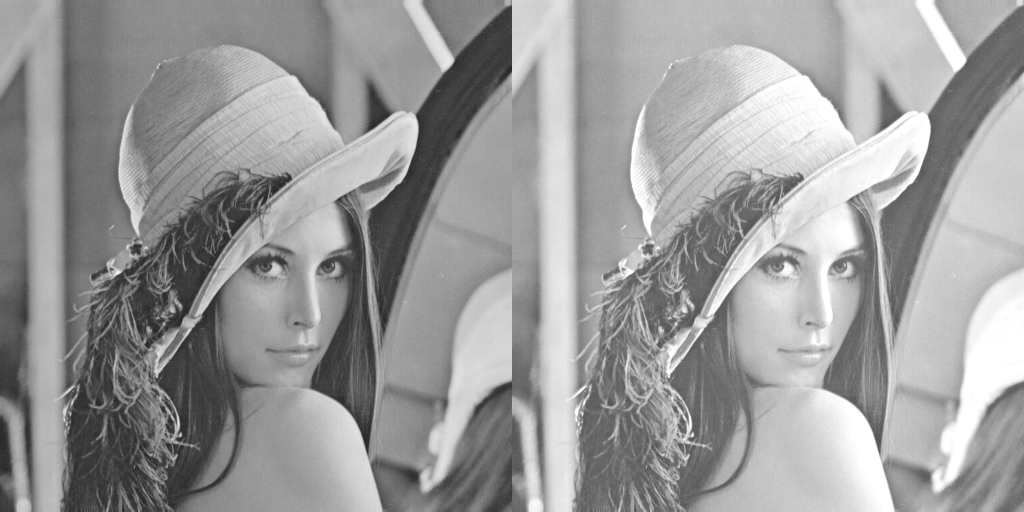

In [7]:
#Ex 2
#Read lena.png in grayscale and shift the intensity values by 45 and visualize. 

I = cv2.imread('/content/drive/My Drive/lena.png', cv2.IMREAD_GRAYSCALE)
linear_shift = 45
I = I.astype('int')
lena_shifted = np.clip((I + linear_shift),0,255).astype('uint8')
cv2_imshow(np.hstack([I,lena_shifted]))


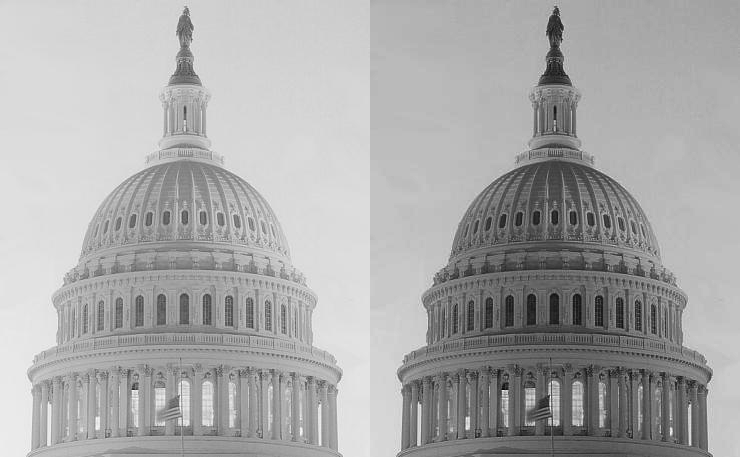

In [8]:

#HW
# Perform gamma transformation on the images gamma1.jpg and gamma2.jpg and see which values of gamma give you better images. 
# Use C = 1.

I = cv2.imread('/content/drive/My Drive/Copy of gamma1.jpg', cv2.IMREAD_GRAYSCALE)
I = I.astype('int')
I_shifted=I/255
I_shifted=I_shifted**2
I_shifted=I_shifted*255
I_shifted = np.clip((I_shifted),0,255).astype('uint8')
cv2_imshow(np.hstack([I,I_shifted]))


In [0]:
I = cv2.imread('/content/drive/My Drive/Copy of gamma2.jpg', cv2.IMREAD_GRAYSCALE)
I = I.astype('int')
I_shifted=I/255
I_shifted=I_shifted**0.5
I_shifted=I_shifted*255
I_shifted = np.clip((I_shifted),0,255).astype('uint8')
cv2_imshow(np.hstack([I,I_shifted]))


In [0]:

#Ex 3
#Write a program to read and plot histogram for a grayscale image.

I = cv2.imread('/content/drive/My Drive/Copy of gamma1.jpg', cv2.IMREAD_GRAYSCALE)
l=[]
for i in range(256):
  l.append(0)

# print(I.shape)
for i in I:
  for j in i:
    l[j]+=1

import matplotlib.pyplot as plt

k=[]
for i in range(256):
  k.append(i)
plt.bar(k,l)
plt.title("intensity frequency")
plt.show()
cv2_imshow(I)


In [0]:
# HW:
# Plot histogram for RGB images ‘lotus.jpg’. You can use inbuilt functions for that. 

I = cv2.imread('/content/drive/My Drive/Copy of lotus.jpg')

l=[]
for i in range(256):
  l.append(0)

for i in I:
  for j in i:
    l[j[0]]+=1

m=[]
for i in range(256):
  m.append(0)

for i in I:
  for j in i:
    m[j[1]]+=1

n=[]
for i in range(256):
  n.append(0)

for i in I:
  for j in i:
    n[j[2]]+=1

k=[]
for i in range(256):
  k.append(i)
plt.bar(k,l,color="red",alpha=0.5)
plt.bar(k,m,color="green",alpha=0.5)
plt.bar(k,n,color="blue",alpha=0.5)

plt.title("Intensity frequency")

print (I.shape)
plt.show()
cv2_imshow(I)




In [0]:
# Ex 4:
# Perform simple thresholding on the image ‘FingerPrint.jpg’. 
# Plot the histogram and observe the threshold value. You can use an inbuilt function for thresholding.

I = cv2.imread('/content/drive/My Drive/Copy of FingerPrint.jpg', cv2.IMREAD_GRAYSCALE)
ret,thresh1 = cv2.threshold(I,127,255,cv2.THRESH_BINARY)
cv2_imshow(np.hstack([I, thresh1]))



In [0]:
#Perform simple thresholding on the image ‘sudoku.jpeg’ in grayscale. 
#Plot the histogram and observe the threshold value. You can use an inbuilt function for thresholding.

I = cv2.imread('/content/drive/My Drive/Copy of sudoku.jpeg', cv2.IMREAD_GRAYSCALE)
ret,thresh1 = cv2.threshold(I,60,255,cv2.THRESH_BINARY)
cv2_imshow(np.hstack([I, thresh1]))


l=[]
for i in range(256):
  l.append(0)

for i in thresh1:
  for j in i:
    l[j]+=1

import matplotlib.pyplot as plt

k=[]
for i in range(256):
  k.append(i)
plt.bar(k,l)
plt.title("intensity frequency")


In [0]:
def convo(I,m,n,filter):
      val=0
      for k in range(3):
        for l in range(3):
          x=i+k-1
          y=j+l-1
          x=max(0,x)
          y=max(0,y)
          x=min(m-1,x)
          y=min(n-1,y)
          val+=filter[i][j]*I[x][y]/9
      return val

I = cv2.imread('/content/drive/My Drive/Copy of sudoku.jpeg',cv2.IMREAD_GRAYSCALE)
I=I.astype('uint8')
filter=[[1,1,1],[1,1,1],[1,1,1]]
m,n=I.shape
Z=I.astype('uint8')
for i in range(m):
  for j in range(n):
      Z[i][j]=convo(I,m,n,filter)

cv2_imshow(np.hstack([I, Z]))

In [0]:
#Count the number of windows in image 'window.jpeg' using edge detection filters.

I = cv2.imread('/content/drive/My Drive/Copy of window.jpeg', cv2.IMREAD_GRAYSCALE)
print (I.shape)

sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
print ('Sobel operator along x')
print (sobel_x)
filtered_image1 = cv2.filter2D(I,-1,sobel_x)

sobel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
print ('Sobel operator along y')
print (sobel_y)
filtered_image2 = cv2.filter2D(I,-1,sobel_y)
p=1
count1=0
for i in range(0,filtered_image2.shape[0],3):
  if(filtered_image2[i][40]>50):

    count1+=1



p=1
count2=0
f=0
for i in range(0,filtered_image2.shape[0]):
  if(filtered_image2[i][40]>200):
    if(f==0):
      count2+=1
      f=1
  else:
    if(f==1):
      f=0
print("number of horizontal edges=",count2)
p*=(count2+1)
count2=0
f=0
for j in range(0,filtered_image1.shape[1]):
  if(filtered_image1[400][j]>200):
    if(f==0):
      count2+=1
      f=1
  else:
    if(f==1):
      f=0
print("number of vertical edges=",(count2))
p*=(count2+1)
print("Number of windows=",p)



magnitude = np.sqrt(np.square(filtered_image1.astype('int')) + np.square(filtered_image2.astype('int')))
final = np.clip((I + magnitude),0,255).astype('uint8')
cv2_imshow(np.hstack([I,filtered_image1,filtered_image2, magnitude, final]))

